In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mediacompany.csv")

In [3]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [5]:
df.shape

(80, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [7]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


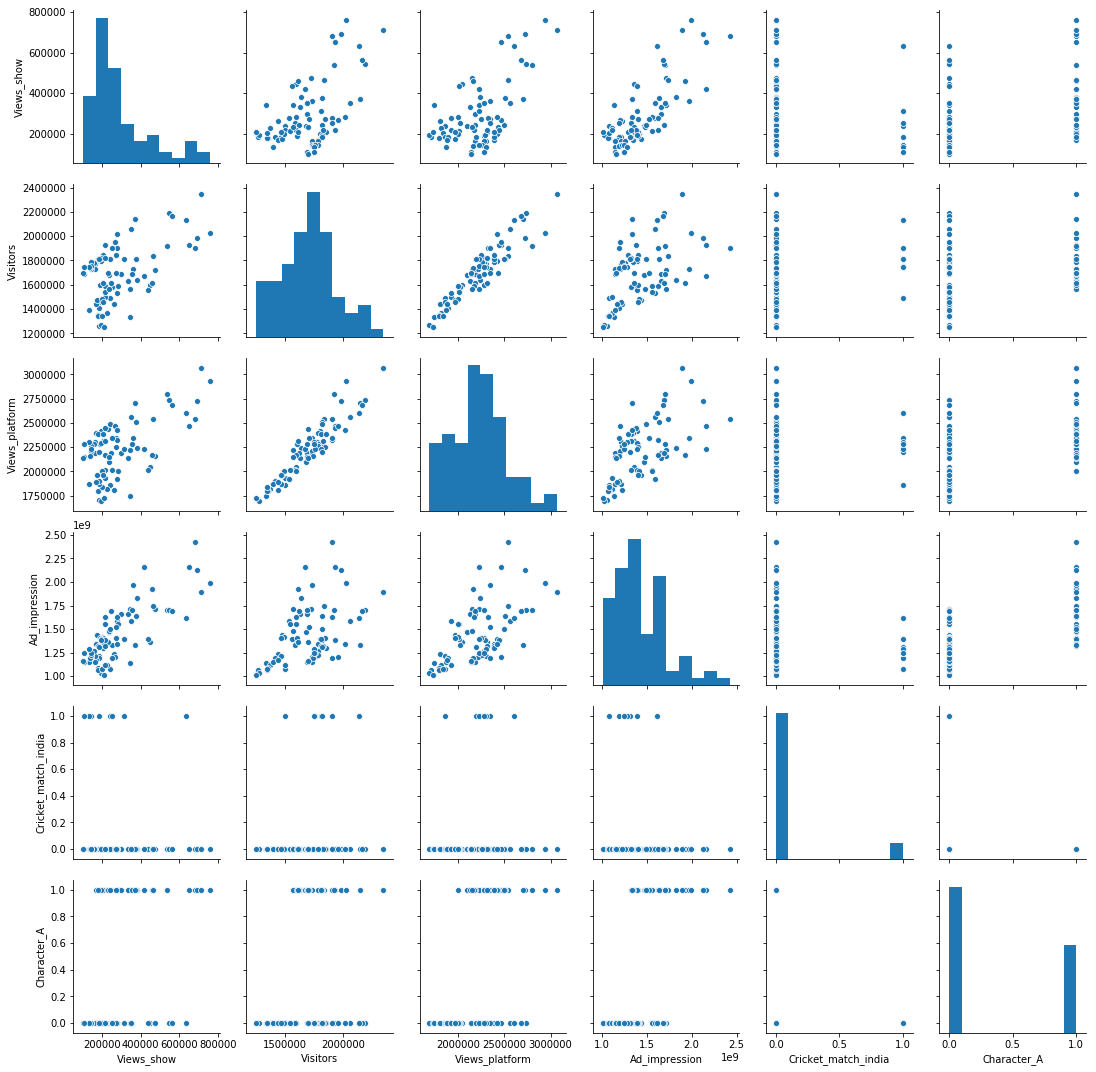

In [8]:
sns.pairplot(df)

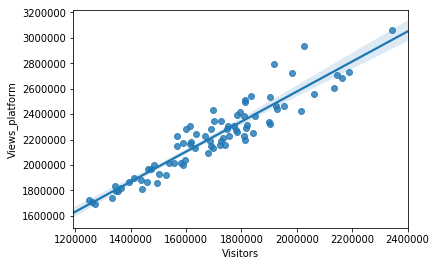

In [9]:
sns.regplot(df.Visitors,df.Views_platform)

In [10]:
#data prepration

In [11]:
#coverting date coln into weekends
#1) converting the object datatype to datetime
df.Date=pd.to_datetime(df.Date)

In [12]:
df.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [13]:
#2) finding the day of the week

df['day']=df.Date.dt.dayofweek
df.drop('Date',axis=1,inplace=True)

In [14]:
df.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,183738,1260228,1706478,1060860448,0,0,2
1,193763,1270561,1690727,1031846645,0,0,3
2,210479,1248183,1726157,1010867575,0,0,4
3,240061,1492913,1855353,1079194579,1,0,5
4,446314,1594712,2041418,1357736987,0,0,6


In [15]:
def fun(x):
    if x==5 or x==6:
        return 1
    else:
        return 0
    
df['weekend']=df.day.apply(lambda x:fun(x))

In [16]:
df.drop("day",axis=1,inplace=True)

In [17]:
df.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekend
0,183738,1260228,1706478,1060860448,0,0,0
1,193763,1270561,1690727,1031846645,0,0,0
2,210479,1248183,1726157,1010867575,0,0,0
3,240061,1492913,1855353,1079194579,1,0,1
4,446314,1594712,2041418,1357736987,0,0,1


#preprocessing data

1) train test split


In [18]:
#

df["Ad_impression"]=df["Ad_impression"]/1000000

In [19]:
df_train, df_test=train_test_split(df,random_state=100,test_size=0.3)

In [20]:
df_train.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekend
57,164043,1772449,2303380,1216.537437,0,0,0
35,244916,1615949,2184161,1690.425253,0,1,0
51,182208,1810697,2387054,1323.744093,0,1,0
21,173280,1474098,1967000,1439.043318,0,0,0
32,679522,1902556,2535991,2424.202948,0,1,1


In [22]:
#preparig x& y

y_train=df_train.pop('Views_show')
X_train=df_train

In [23]:
X_train.head()

,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekend
57,1772449,2303380,1216.537437,0,0,0
35,1615949,2184161,1690.425253,0,1,0
51,1810697,2387054,1323.744093,0,1,0
21,1474098,1967000,1439.043318,0,0,0
32,1902556,2535991,2424.202948,0,1,1


In [24]:
#Model Building
x_sm= sm.add_constant(X_train)

lr= sm.OLS(y_train,x_sm)
model = lr.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     35.52
Date:                Tue, 03 May 2022   Prob (F-statistic):           3.27e-16
Time:                        21:04:27   Log-Likelihood:                -693.15
No. Observations:                  56   AIC:                             1400.
Df Residuals:                      49   BIC:                             1414.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.791e+05   7.76e+04     -4.883      0.000   -5.35e+05   -2.23e+05
Visitors               -0.3084      0.169     -1.820      0.075      -0.649       0.032
Views_platform          0.3274      0.145      2.252      0.029       0.035       0.620
Ad_impression         311.4987     40.448      7.701      0.000     230.216     392.781
Cricket_match_india -3.382e+04   2.67e+04     -1.268      0.211   -8.74e+04    1.98e+04
Character_A         -6.824e+04   2.77e+04     -2.467      0.017   -1.24e+05   -1.27e+04
weekend              1.368e+05   2.21e+04      6.197      0.000    9.25e+04    1.81e+05
==============================================================================
Omnibus:                        1.987   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.945
Skew:                           0.404   Prob(JB):                        0.378
Kurtosis:                       2.574   Cond. No.                     2.69e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Views_platform,1182.55
0,Visitors,1124.14
2,Ad_impression,46.01
4,Character_A,2.86
5,weekend,1.79
3,Cricket_match_india,1.32


In [26]:
X_train.drop("Cricket_match_india",axis=1,inplace=True)

In [27]:
x_sm= sm.add_constant(X_train)

lr2= sm.OLS(y_train,x_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     41.79
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.03e-16
Time:                        21:04:29   Log-Likelihood:                -694.05
No. Observations:                  56   AIC:                             1400.
Df Residuals:                      50   BIC:                             1412.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.825e+05   7.81e+04     -4.900      0.000   -5.39e+05   -2.26e+05
Visitors          -0.3469      0.168     -2.068      0.044      -0.684      -0.010
Views_platform     0.3517      0.145      2.426      0.019       0.060       0.643
Ad_impression    318.5335     40.308      7.902      0.000     237.572     399.495
Character_A    -6.614e+04   2.78e+04     -2.381      0.021   -1.22e+05   -1.03e+04
weekend         1.385e+05   2.22e+04      6.247      0.000     9.4e+04    1.83e+05
==============================================================================
Omnibus:                        1.507   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.497
Skew:                           0.321   Prob(JB):                        0.473
Kurtosis:                       2.520   Cond. No.                     2.69e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Views_platform,1162.20
0,Visitors,1088.75
2,Ad_impression,45.20
3,Character_A,2.83
4,weekend,1.78


In [29]:
X_train.drop("Views_platform",axis=1,inplace=True)

In [30]:
X_sm=sm.add_constant(X_train)

lr3=sm.OLS(y_train,X_sm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     46.33
Date:                Tue, 03 May 2022   Prob (F-statistic):           2.19e-16
Time:                        21:04:30   Log-Likelihood:                -697.17
No. Observations:                  56   AIC:                             1404.
Df Residuals:                      51   BIC:                             1414.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.915e+05   7.17e+04     -4.068      0.000   -4.35e+05   -1.48e+05
Visitors          0.0469      0.044      1.062      0.293      -0.042       0.135
Ad_impression   323.1315     42.147      7.667      0.000     238.517     407.746
Character_A   -2.679e+04   2.36e+04     -1.135      0.262   -7.42e+04    2.06e+04
weekend        1.204e+05   2.19e+04      5.510      0.000    7.66e+04    1.64e+05
==============================================================================
Omnibus:                        3.028   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.299
Skew:                           0.486   Prob(JB):                        0.317
Kurtosis:                       3.205   Cond. No.                     1.43e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Ad_impression,42.84
0,Visitors,37.41
2,Character_A,2.26
3,weekend,1.42


In [32]:
X_train.drop("Visitors",axis=1,inplace=True)

In [33]:
X_sm=sm.add_constant(X_train)

lr4=sm.OLS(y_train,X_sm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     61.25
Date:                Tue, 03 May 2022   Prob (F-statistic):           4.44e-17
Time:                        21:04:32   Log-Likelihood:                -697.78
No. Observations:                  56   AIC:                             1404.
Df Residuals:                      52   BIC:                             1412.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.373e+05   5.04e+04     -4.712      0.000   -3.38e+05   -1.36e+05
Ad_impression   339.8253     39.157      8.678      0.000     261.250     418.400
Character_A   -2.819e+04   2.36e+04     -1.195      0.238   -7.55e+04    1.92e+04
weekend         1.28e+05   2.07e+04      6.193      0.000    8.66e+04     1.7e+05
==============================================================================
Omnibus:                        4.916   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                3.901
Skew:                           0.521   Prob(JB):                        0.142
Kurtosis:                       3.766   Cond. No.                     8.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Ad_impression,2.30
1,Character_A,1.84
2,weekend,1.39


In [35]:
X_train.drop("Character_A",axis=1,inplace=True)

In [36]:
X_sm=sm.add_constant(X_train)

lr5=sm.OLS(y_train,X_sm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     90.43
Date:                Tue, 03 May 2022   Prob (F-statistic):           8.25e-18
Time:                        21:04:34   Log-Likelihood:                -698.54
No. Observations:                  56   AIC:                             1403.
Df Residuals:                      53   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.059e+05   4.32e+04     -4.771      0.000   -2.93e+05   -1.19e+05
Ad_impression   310.2489     30.465     10.184      0.000     249.144     371.354
weekend        1.316e+05   2.05e+04      6.408      0.000    9.04e+04    1.73e+05
==============================================================================
Omnibus:                        3.729   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                2.804
Skew:                           0.383   Prob(JB):                        0.246
Kurtosis:                       3.784   Cond. No.                     7.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Ad_impression,1.38
1,weekend,1.38


In [38]:
X_train.shape

(56, 2)

In [39]:
y_train_pred= lr2.predict(x_sm)

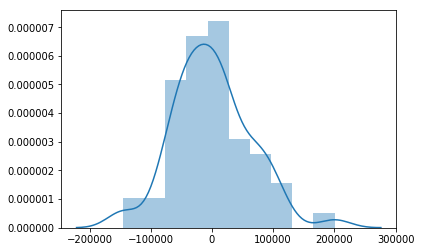

In [50]:
sns.distplot((y_train-y_train_pred))

In [41]:
y_test=df_test.pop("Views_show")

In [42]:
X_test=df_test[["Ad_impression","weekend"]]

In [43]:
X_test=sm.add_constant(X_test)

In [44]:
X_test.head()

,const,Ad_impression,weekend
25,1.0,2158.026705,1
46,1.0,1992.525162,1
69,1.0,1321.700567,0
5,1.0,1140.228426,0
42,1.0,1407.426028,0


In [45]:
X_test.head()

,const,Ad_impression,weekend
25,1.0,2158.026705,1
46,1.0,1992.525162,1
69,1.0,1321.700567,0
5,1.0,1140.228426,0
42,1.0,1407.426028,0


In [46]:
y_train_pred=lr5.predict(X_sm)

In [47]:
r2_score(y_train,y_train_pred)

0.7733619950071944

In [48]:
y_test_pred=lr5.predict(X_test)

In [49]:
r2_score(y_test,y_test_pred)

0.7658432273376067